In [1]:
### Image and Bounding Box

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

#dataset_path = sys.argv[1]

dataset_path = '.\\'

IMAGE_FOLDER = ".\\JPEGImages"
ANNOTATIONS_FOLDER = ".\\Annotations"

ann_root, ann_dir, ann_files = next(os.walk(os.path.join(dataset_path, ANNOTATIONS_FOLDER)))
img_root, amg_dir, img_files = next(os.walk(os.path.join(dataset_path, IMAGE_FOLDER)))

for xml_file in ann_files:

    # XML파일와 이미지파일은 이름이 같으므로, 확장자만 맞춰서 찾습니다.
    img_name = img_files[img_files.index(".".join([xml_file.split(".")[0], "jpg"]))]
    img_file = os.path.join(img_root, img_name)
    image = Image.open(img_file).convert("RGB")
    draw = ImageDraw.Draw(image)

    xml = open(os.path.join(ann_root, xml_file), "r")
    tree = Et.parse(xml)
    root = tree.getroot()

    size = root.find("size")

    width = size.find("width").text
    height = size.find("height").text
    channels = size.find("depth").text

    objects = root.findall("object")

In [3]:
#_object.find("name").text

In [4]:
#int(bndbox.find("ymax").text)

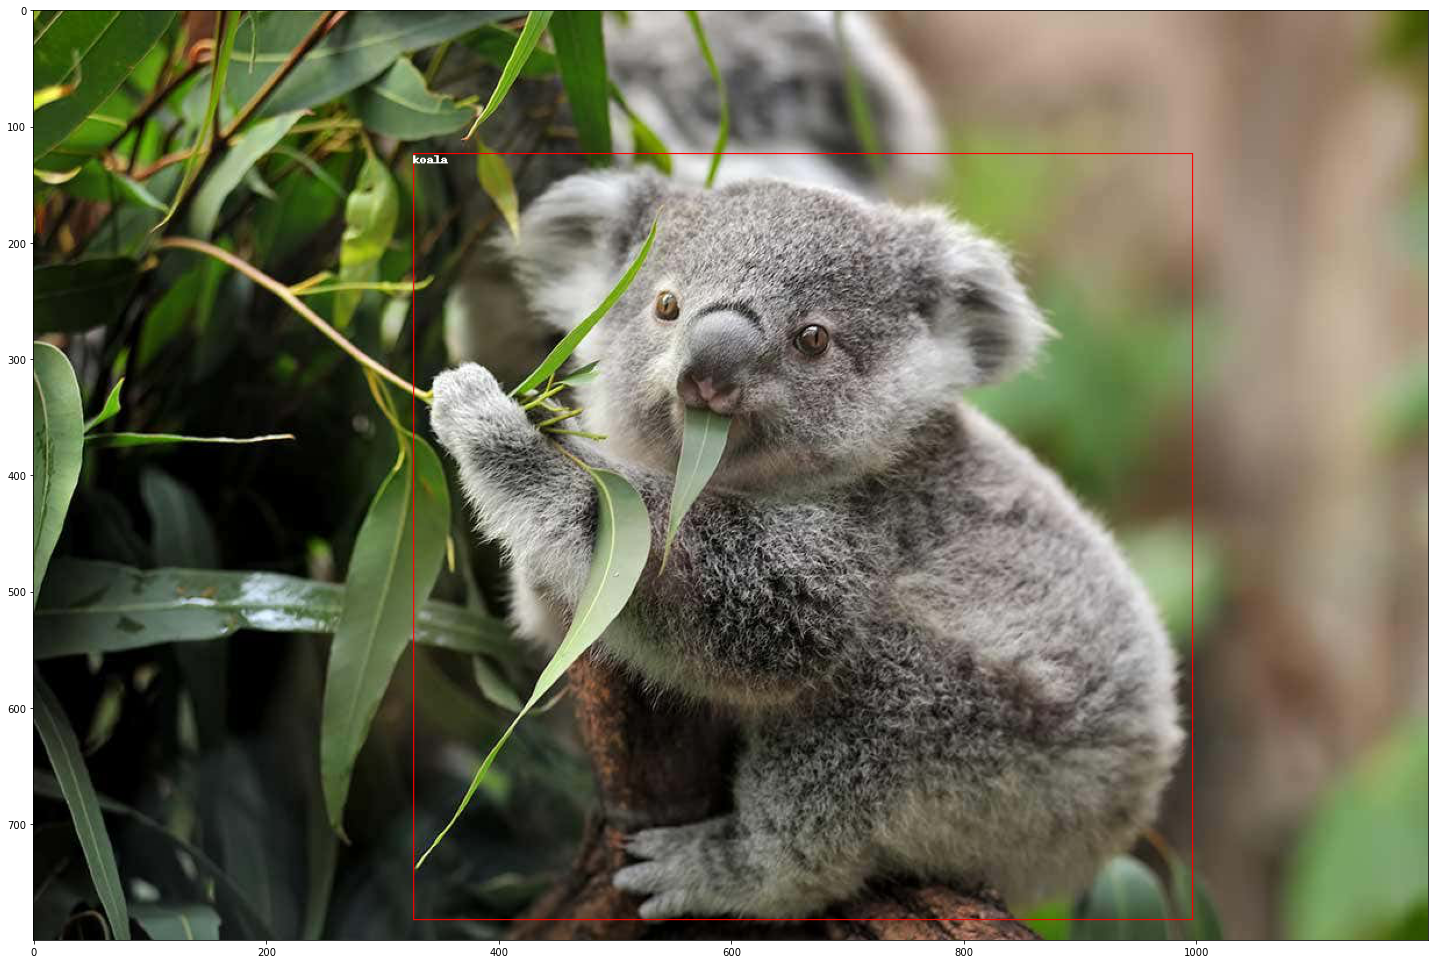

In [5]:
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox")

        xmin = float(bndbox.find("xmin").text)
        ymin = float(bndbox.find("ymin").text)
        xmax = float(bndbox.find("xmax").text)
        ymax = float(bndbox.find("ymax").text)
        '''
        print(bndbox.find("xmin").text)
        xmin = bndbox.find("xmin").text
        xmin = float(xmin)
        ymin = 123
        xmax = 997
        ymax = 782
        '''
        # Box를 그릴 때, 왼쪽 상단 점과, 오른쪽 하단 점의 좌표를 입력으로 주면 됩니다.
        draw.rectangle(((xmin, ymin), (xmax, ymax)), outline="red")
        draw.text((xmin, ymin), name)

    plt.figure(figsize=(25,20))
    plt.imshow(image)
    plt.show()
    plt.close()